In [2]:
10+2

12

Starting Portfolio Value: 100000.00
BUY 60509 shares at 1.57
1999-03-04, BUY EXECUTED, 1.65
SELL shares at 1.62
1999-03-08, SELL EXECUTED, 1.58
BUY 56744 shares at 1.6
1999-03-12, BUY EXECUTED, 1.61
SELL shares at 1.61
1999-03-29, SELL EXECUTED, 1.66
BUY 61387 shares at 1.52
1999-03-31, BUY EXECUTED, 1.57
SELL shares at 1.63
1999-04-01, SELL EXECUTED, 1.63
BUY 61153 shares at 1.58
1999-04-05, BUY EXECUTED, 1.56
SELL shares at 1.62
1999-04-08, SELL EXECUTED, 1.63
BUY 64840 shares at 1.55
1999-04-13, BUY EXECUTED, 1.58
SELL shares at 1.42
1999-05-12, SELL EXECUTED, 1.44
BUY 65966 shares at 1.39
1999-05-17, BUY EXECUTED, 1.37
SELL shares at 1.46
1999-05-18, SELL EXECUTED, 1.47
BUY 72971 shares at 1.34
1999-05-21, BUY EXECUTED, 1.32
SELL shares at 1.39
1999-06-10, SELL EXECUTED, 1.39
BUY 78203 shares at 1.31
1999-06-15, BUY EXECUTED, 1.31
SELL shares at 1.35
1999-06-17, SELL EXECUTED, 1.34
BUY 79754 shares at 1.31
1999-06-18, BUY EXECUTED, 1.32
SELL shares at 1.33
1999-06-22, SELL EXECUTED

2008-04-14, BUY EXECUTED, 17.09
SELL shares at 18.39
2008-04-22, SELL EXECUTED, 18.06
BUY 2221 shares at 20.63
2008-06-11, BUY EXECUTED, 20.63
SELL shares at 10.63
2008-08-07, SELL EXECUTED, 10.54
BUY 2337 shares at 10.47
2008-08-08, BUY EXECUTED, 10.55
SELL shares at 11.35
2008-08-14, SELL EXECUTED, 11.26
BUY 2280 shares at 11.4
2008-09-03, BUY EXECUTED, 11.25
SELL shares at 10.41
2008-09-25, SELL EXECUTED, 10.41
BUY 2581 shares at 9.35
2008-09-30, BUY EXECUTED, 9.50
SELL shares at 7.42
2008-10-29, SELL EXECUTED, 7.38
BUY 2680 shares at 7.05
2008-11-07, Order Canceled/Margin/Rejected
BUY 2617 shares at 7.22
2008-11-12, BUY EXECUTED, 7.00
SELL shares at 7.35
2008-11-14, SELL EXECUTED, 7.05
BUY 2859 shares at 6.64
2008-11-17, BUY EXECUTED, 6.57
SELL shares at 7.04
2008-11-28, SELL EXECUTED, 6.93
BUY 2883 shares at 6.91
2008-12-01, BUY EXECUTED, 6.64
SELL shares at 7.02
2008-12-04, SELL EXECUTED, 6.88
BUY 3136 shares at 6.55
2008-12-05, BUY EXECUTED, 6.35
SELL shares at 6.81
2008-12-08, 

BUY 1628 shares at 17.33
2014-04-14, BUY EXECUTED, 17.44
SELL shares at 17.64
2014-04-16, SELL EXECUTED, 17.73
BUY 1620 shares at 17.66
2014-05-01, BUY EXECUTED, 17.93
SELL shares at 17.81
2014-05-06, SELL EXECUTED, 17.98
BUY 1641 shares at 17.45
2014-05-07, BUY EXECUTED, 17.45
SELL shares at 17.77
2014-05-13, SELL EXECUTED, 17.53
BUY 1642 shares at 17.48
2014-05-14, BUY EXECUTED, 17.49
SELL shares at 17.73
2014-05-20, SELL EXECUTED, 17.73
BUY 1657 shares at 17.52
2014-05-21, BUY EXECUTED, 17.59
SELL shares at 17.6
2014-05-23, SELL EXECUTED, 17.69
BUY 1602 shares at 18.18
2014-06-23, BUY EXECUTED, 17.94
SELL shares at 18.36
2014-07-10, SELL EXECUTED, 18.01
BUY 1648 shares at 17.71
2014-07-21, BUY EXECUTED, 17.65
SELL shares at 18.25
2014-08-11, SELL EXECUTED, 18.27
BUY 1631 shares at 18.45
2014-09-15, BUY EXECUTED, 18.50
SELL shares at 18.76
2014-09-19, SELL EXECUTED, 18.81
BUY 1657 shares at 18.41
2014-09-22, BUY EXECUTED, 18.78
SELL shares at 17.67
2014-10-22, SELL EXECUTED, 17.65
BU

<IPython.core.display.Javascript object>


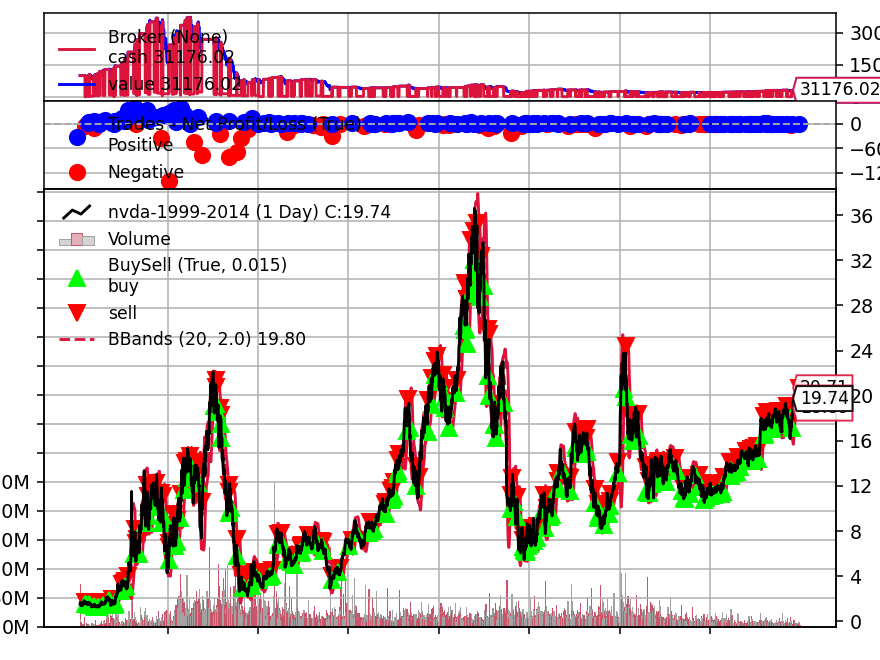

In [33]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])
import math 

# Import the backtrader platform
import backtrader as bt

class BollingerBands(bt.Strategy) :
    
#     params = (('period',20))
    
    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))
    
    def __init__ (self) :
        self.bband = bt.indicators.BBands(self.datas[0], period=20)
        
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None
        
    def next(self) :        
        if not self.position :
            if self.data.close[0] < self.bband.lines.bot :
                self.numShares = math.floor(self.broker.cash * 0.95/self.data.close)
                
                print("BUY {} shares at {}".format(self.numShares,self.data.close[0]))
                self.buy(size = self.numShares)
            
            elif self.data.close[0] < self.bband.lines.mid :
                self.numShares = math.floor(self.broker.cash * 0.95/self.data.close)
                
                print("BUY {} shares at {}".format(self.numShares,self.data.close[0]))
                self.buy(size = self.numShares)
        
        else :
            if self.data.close[0] > self.bband.lines.top :
                print('SELL shares at {}'.format(self.data.close[0]))
                self.close()
            
            elif self.data.close[0] > self.bband.lines.mid :
                print('SELL shares at {}'.format(self.data.close[0]))
                self.close()

if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(BollingerBands)
    name = ['orcl-1995-2014.txt','nvda-1999-2014.txt','yhoo-1996-2014.txt','AAPL.txt']

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname= name[1],
        # Do not pass values before this date
        fromdate=datetime.datetime(1999, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2014, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)
    cerebro.broker.setcommission(commission=0.001)
    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    
    cerebro.plot()

From 1999 :
280045.32 -> orc -> 1
365440.16 -> orc -> 2      

31176.02 -> nvid -> 1
27897.19 -> nvid -> 2

49189.10 -> yahoo -> 1
103953.21 -> yahoo -> 2

233483.25 -> AAPL -> 1
321910.49 -> AAPL -> 2

Considering Data after 2003 :
312098.38 -> orc -> 1
293550.88 -> orc -> 2

47115.94 -> nvid -> 1
86813.96 -> nvid -> 2

281037.40 -> yahoo -> 1
354401.81 -> yahoo -> 2

225532.74 -> AAPL -> 1
283802.94 -> AAPL -> 2